In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
# Задачи

#     Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных 
#     значений и описательную статистику.
    
#     Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? 
#     Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
    
#     Сколько транзакций завершились ошибкой?
    
#     Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа 
#     успешных транзакций.
    
#     Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве 
#     столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в 
#     указанную минуту. Пропущенные значения заполните нулями.
   
#     Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
    
#     Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, 
#     в колонку true_minute.

# Описание данных

# Имеются следующие данные:

#     date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
#     name – имя пользователя
#     transaction – статус транзакции
#     minute* – сколько минут прошло с начала дня

In [14]:
#     Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных 
#     значений и описательную статистику.

In [15]:
transaction_data = pd.read_csv('transaction_data.csv')
transaction_data

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [16]:
transaction_data.shape

(5315, 3)

In [17]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [18]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [19]:
transaction_data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [ ]:
#     Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? 
#     Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

In [27]:
transaction_data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [23]:
transaction_data.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [50]:
transaction_data_bar = transaction_data.groupby('transaction', as_index=False) \
    .agg({'date': 'count'})
transaction_data_bar

,transaction,date
0,cancelled,1619
1,error,4
2,successfull,3692


<AxesSubplot:xlabel='transaction', ylabel='date'>

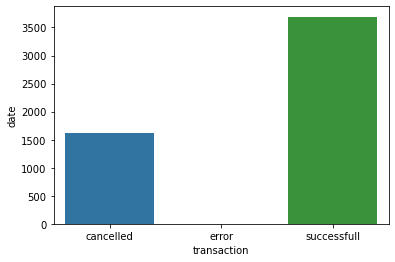

In [35]:
sns.barplot(x="transaction", y="date", data=transaction_data_bar)

In [ ]:
#     Сколько транзакций завершились ошибкой?

In [36]:
transaction_data_bar = transaction_data.groupby('transaction', as_index=False) \
    .agg({'date': 'count'}) \
    .query("transaction == 'error'")
transaction_data_bar

,transaction,date
1,error,4


In [ ]:
#     Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа 
#     успешных транзакций.

In [65]:
transaction_data_successfull = transaction_data \
    .query("transaction == 'successfull'") \
    .groupby('name', as_index=False) \
    .agg({'transaction': 'count'}) 
transaction_data_successfull.head()

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


In [66]:
transaction_data_successfull.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


<AxesSubplot:xlabel='transaction', ylabel='count'>

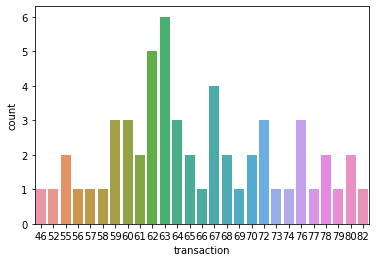

In [67]:
sns.countplot(x='transaction',  data=transaction_data_successfull)

In [ ]:
#     Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве 
#     столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в 
#     указанную минуту. Пропущенные значения заполните нулями.

In [69]:
transaction_data_updated = pd.read_csv('transaction_data_updated.csv')
transaction_data_updated

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [73]:
transaction_data_updated \
    .groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction': 'count'})

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [83]:
user_vs_minute_pivot = transaction_data_updated \
    .groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction': 'count'}) \
    .pivot(index='minute', columns='name', values='transaction') \
    .fillna(0)
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [ ]:
#     Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
    
#     Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, 
#     в колонку true_minute.

In [87]:
transaction_data_updated.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [89]:
transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated.date)

In [91]:
transaction_data_updated.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [95]:
transaction_data_updated['true_minute'] = transaction_data_updated.date.dt.minute + transaction_data_updated.date.dt.hour*60
transaction_data_updated

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [99]:
true_data = transaction_data_updated \
    .groupby('true_minute', as_index=False) \
    .agg({'transaction': 'count'})
true_data

,true_minute,transaction
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57
...,...,...
85,85,68
86,86,52
87,87,59
88,88,62


<AxesSubplot:xlabel='true_minute', ylabel='transaction'>

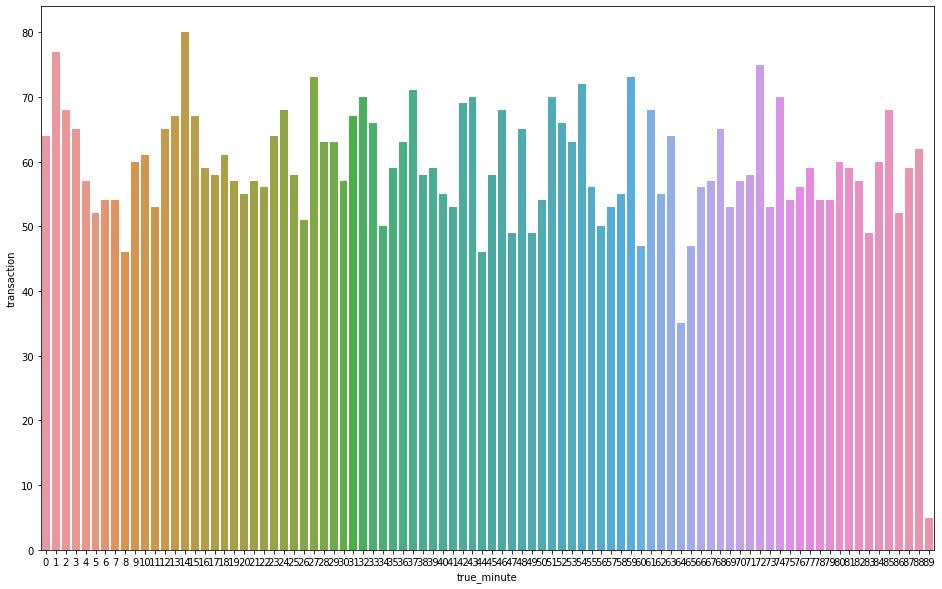

In [104]:
plt.figure(figsize=(16, 10))
sns.barplot(x='true_minute', y='transaction', data=true_data)